In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

In [2]:
file='./russia_losses_equipment.csv'
df=pd.read_csv(file)

In [3]:
df.head() 
df=df.dropna(axis=1)

In [4]:
df.tail()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare
243,2022-10-26,245,271,248,2628,5351,1686,379,1379,16,192
244,2022-10-27,246,271,249,2631,5364,1690,379,1398,16,192
245,2022-10-28,247,272,251,2640,5378,1698,379,1401,16,192
246,2022-10-29,248,273,252,2659,5401,1708,380,1406,16,195
247,2022-10-30,249,274,252,2672,5453,1724,383,1412,16,197


In [5]:
# datum=df[["date"]]

In [7]:
# pd.to_datetime(datum)

In [9]:
# datum

In [10]:
# type(datum)

In [66]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold,GridSearchCV,train_test_split,RepeatedKFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression,LinearRegression
y=df[["aircraft","helicopter","tank","APC"]]
# y=datum
X=df[["day"]]
# cf=ColumnTransformer([
#     ("date",OneHotEncoder(),["date"])
# ],remainder='passthrough')
# cf.fit(y)
# y_transformed=cf.transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,shuffle=True,random_state=10)

model=KNeighborsClassifier(algorithm="ball_tree",n_jobs=2)
model=LinearRegression(normalize=True)

model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [67]:
print(model.score(X_train,y_train))

0.9020163283987873


In [68]:
print(model.score(X_test,y_test))

0.8900969206317084


In [87]:
X_pred=pd.DataFrame([[75],[200],[300],[365]],columns=["day_equi_losses"])

In [88]:
resultsdays=model.predict(X_pred)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- day_equi_losses
Feature names seen at fit time, yet now missing:
- day

  warnings.warn(message, FutureWarning)


In [89]:
resultdays_df=pd.DataFrame(resultsdays,columns=["aircraft","helicopter","tank","APC"])

In [90]:
resultdays_df

,aircraft,helicopter,tank,APC
0,160.606986,143.016103,1013.090510,2530.239353
1,255.929395,220.910125,2194.413982,4719.131943
2,332.187323,283.225343,3139.472760,6470.246015
3,381.754976,323.730235,3753.760965,7608.470162


In [91]:
result_complete_df=pd.concat([X_pred,resultdays_df],axis=1)

In [92]:
result_complete_df

,day_equi_losses,aircraft,helicopter,tank,APC
0,75,160.606986,143.016103,1013.090510,2530.239353
1,200,255.929395,220.910125,2194.413982,4719.131943
2,300,332.187323,283.225343,3139.472760,6470.246015
3,365,381.754976,323.730235,3753.760965,7608.470162


In [82]:
result_complete_df.corr()

,day_equi_losses,aircraft,helicopter,tank,APC
day_equi_losses,1.0,1.0,1.0,1.0,1.0
aircraft,1.0,1.0,1.0,1.0,1.0
helicopter,1.0,1.0,1.0,1.0,1.0
tank,1.0,1.0,1.0,1.0,1.0
APC,1.0,1.0,1.0,1.0,1.0


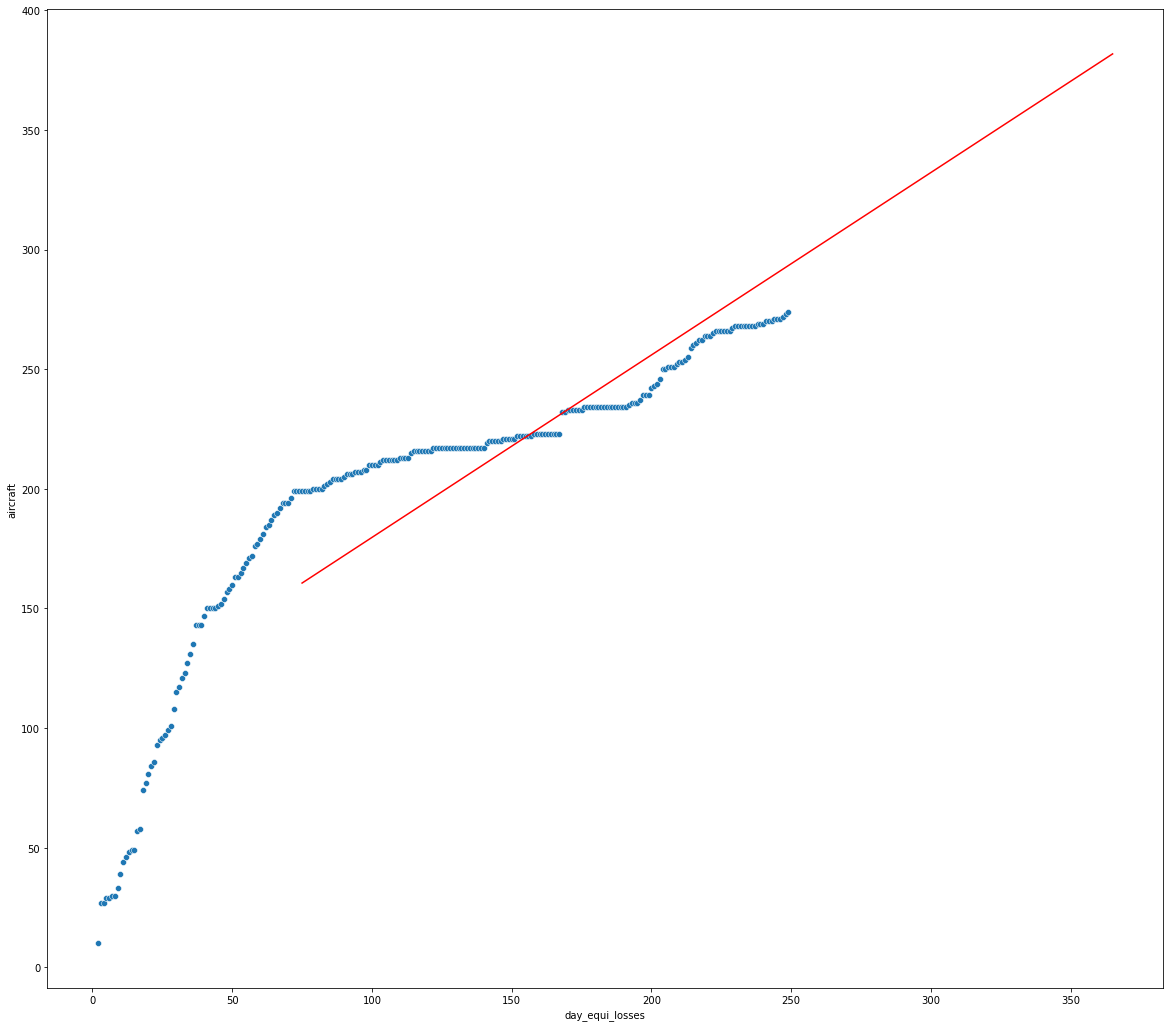

In [80]:
plt.figure(figsize=(20,18))
ax=sns.lineplot(x=result_complete_df["day_equi_losses"]
        ,y=result_complete_df["aircraft"],color="red")
sns.scatterplot(x="day",y="aircraft",data=df,ax=ax)
plt.show()

# Train with TF2

In [154]:
y_tf=df["aircraft"]
# y=datum
X_2=df["day"]

In [155]:
X_tf2_train,X_tf2_test,y_tf2_train,y_tf2_test=train_test_split(
        X_2,y_tf,train_size=0.75

)

# X_tf2_train,X_tf2_test,y_tf2_train,y_tf2_test=train_test_split(
#         X_train,y_train,
#     train_size=0.75

# )

## TF2 Tries

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Softmax

model=Sequential()
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(18,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(10,activation="relu"))

try:
    model.compile(

        optimizer="rmsprop",loss='binary_crossentropy',
        metrics=["accuracy"]

    )
   

    model.fit(X_tf2_train,y_tf2_train,batch_size=128, 
              epochs=10)
    model.summary()
except Exception as e:
    print(e.args)



Epoch 1/10
2/2 [==============================] - 2s 9ms/step - loss: 2080.5188 - accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 1430.7875 - accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 1082.7103 - accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 1064.0190 - accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 1047.6389 - accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 1033.6617 - accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 1011.5854 - accuracy: 0.0000e+00
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 978.6516 - accuracy: 0.0000e+00
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 856.3068 - accuracy: 0.0000e+00
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 672.

In [162]:
plotHistory=pd.DataFrame(model.history.history)

""


In [163]:
plotHistory.plot()

TypeError: no numeric data to plot

In [157]:
model.evaluate(X_tf2_train,y_tf2_train)

6/6 [==============================] - 0s 3ms/step - loss: 649.9301 - accuracy: 0.0000e+00


[649.9300537109375, 0.0]

In [158]:
model.predict([[200]])

1/1 [==============================] - 0s 203ms/step


array([[0.        , 0.5099027 , 0.15207116, 0.        , 0.        ,
        0.59253585, 0.2842391 , 0.7648712 , 1.1154556 , 0.51655704]],
      dtype=float32)

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2023-02-19        | 1.0     | Mohamed Belhedi |This Notebook |

<hr>

## <h3 align="center"> © Mohamed Belhedi 2023<h3/>
 <p><b>By the Way this Notebook was not made,to put a Political 
       Statment and take a side or Position in this Conflict/War, i´m
        neutral and behind any war there is no Solution, at the end who are the loser in this war? Only the Civilian who lost their Families or their own lives. We pray for Freedom for both sides.
        This Notebook made for Educational Purposes
     Thank you</b> </p>